In [2]:
%load_ext autoreload
%autoreload 2

import copy
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat

from scipy.signal import windows
from girf_proc2.data_utils import get_girf
from skope.skope_girf_utils import *

import os
import sys
sys.path.append('../..')
import gropt2

sys.path.append('../')
from ecpc_utils import prepare_bgpc_seq, run_all, wave_plotter
from scipy.spatial.transform import Rotation as R

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
fname = os.path.abspath('../../../../../projects/matlab2/pulseq14/seqs/bgpc_2023_0420/pseq_basetimes_v0_30_80.mat')
all_H0 = np.load('./all_H0_3av.npz')['all_H0_3av']

# Axial, First window position
----------------

[win_start, win_stop] = [451, 461]
excite_idx_in: [  77 1277]


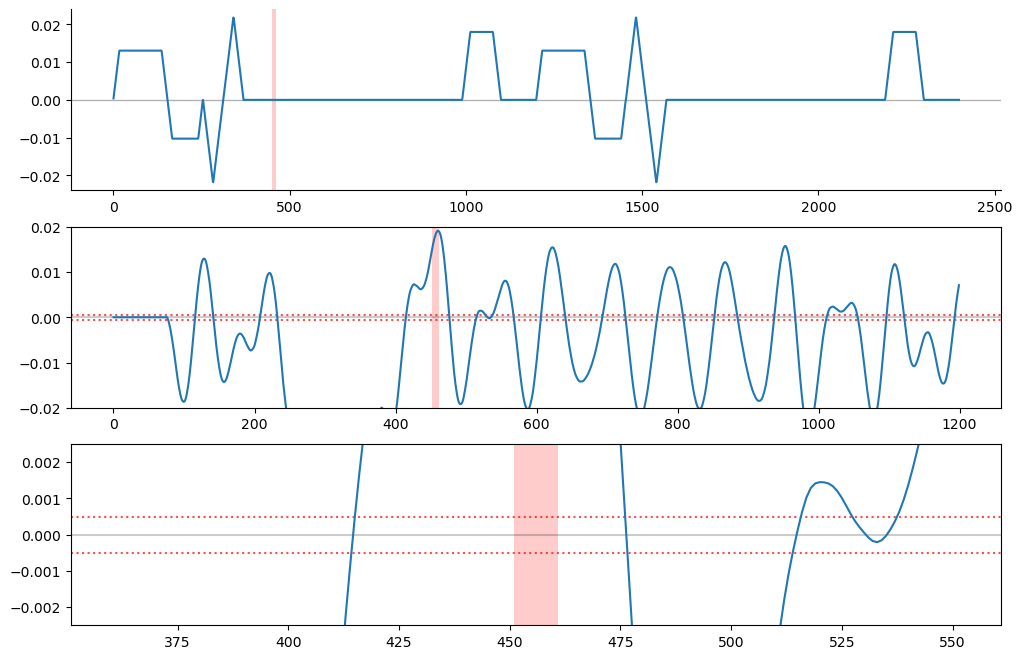

In [3]:
kwargs = {
           "T_bp":1.0e-3,
           "T_spoil": 1.0e-3,
           "shrink": 1,
           "tol": .0005,
           "offset_te": 5,
           "dW": 10,
           "do_ecpc": False,
           "do_bipolar":False,
           "do_spoiler":False,
           "verbose": 0,
            "print_optimize": False,
             }


g_out_ref, res_ref = run_all(fname, all_H0[0], **kwargs)

wave_plotter(g_out_ref, res_ref)

if res_ref['final_good'] > 0:
    savemat('./waves_2023_0719_2/ref.mat', res_ref)

[win_start, win_stop] = [465, 475]
excite_idx_in: [  77 1277]
Status: True
0.1496477070844558


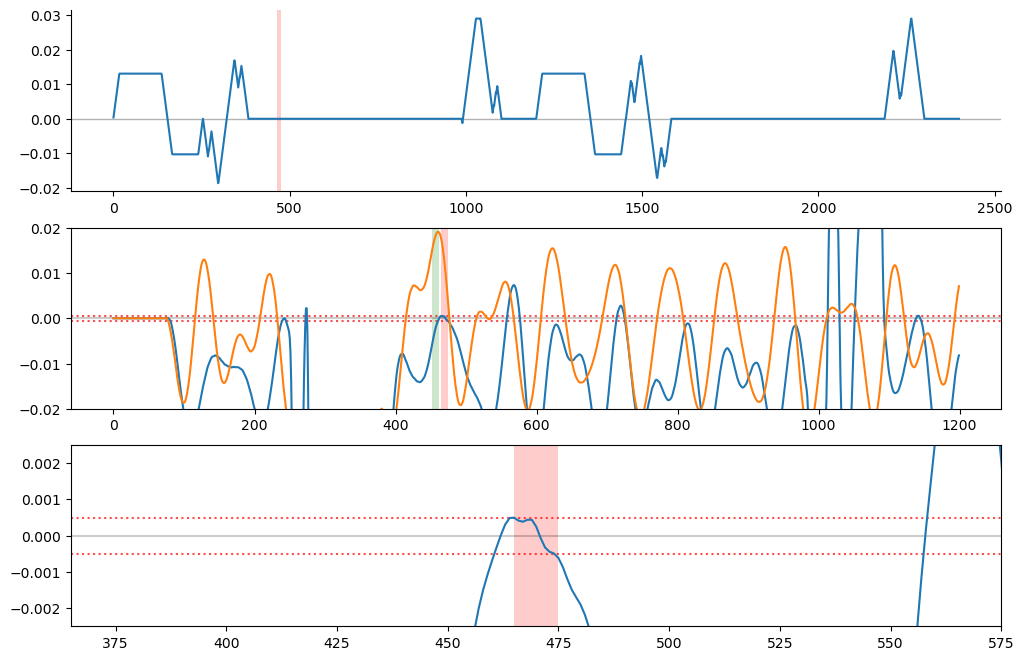

In [4]:
kwargs0 = {
           "T_bp": 1.30e-3,
           "T_spoil": 1.13e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 5,
           "dW": 10,
           "do_bipolar":True,
           "do_spoiler":True,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 14,
           "cg_resid_tol": 1e-1,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 1000,
            "kaiser_sigma": 300,
            # "add_tik": True,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, all_H0[0], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(0,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

[win_start, win_stop] = [476, 486]
excite_idx_in: [  77 1277]
Status: True
0.13333695464642598


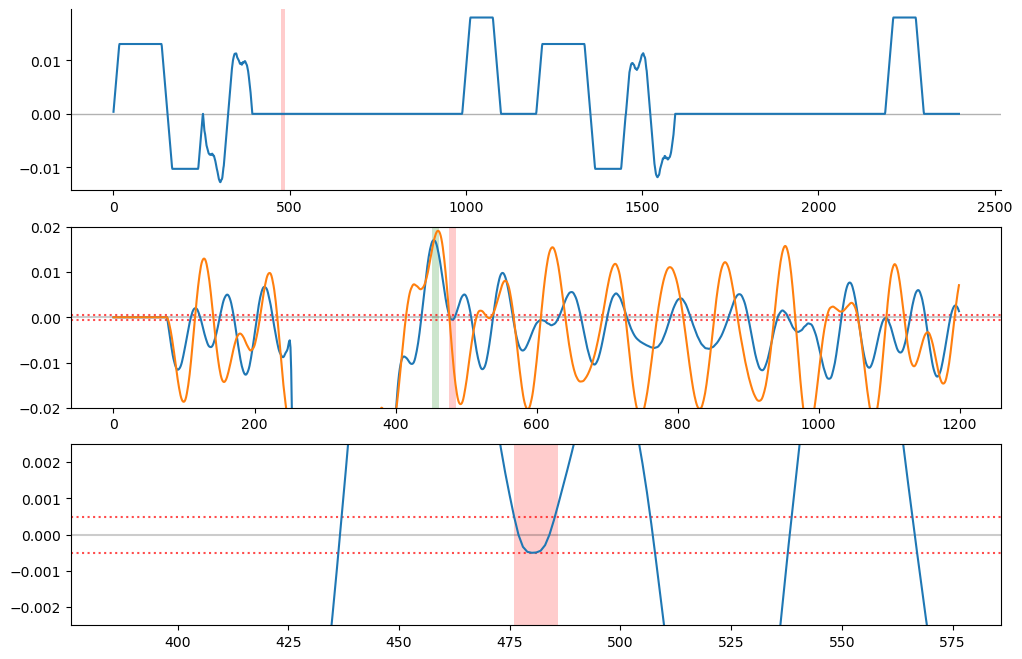

In [5]:
kwargs = copy.deepcopy(kwargs0)
kwargs['T_bp'] = 1.41e-3
kwargs['do_spoiler'] = False

g_out, res = run_all(fname, all_H0[0], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(0,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

[win_start, win_stop] = [451, 461]
excite_idx_in: [  77 1277]
Status: True
0.16365960947714037


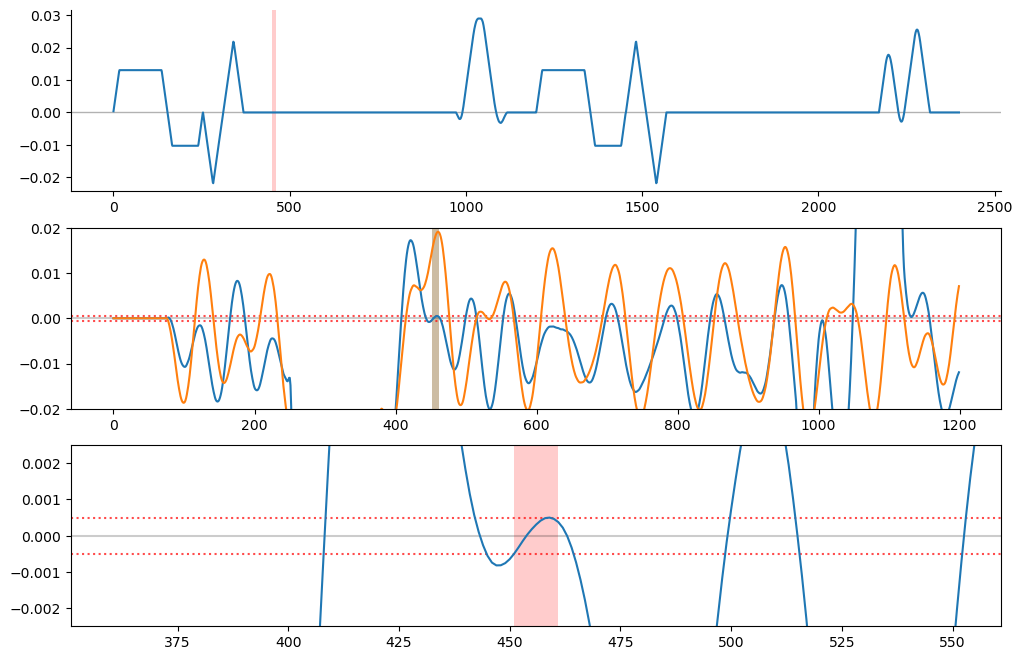

In [6]:

kwargs0 = {
           "T_bp": 1.30e-3,
           "T_spoil": 1.13e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 5,
           "dW": 10,
           "do_bipolar":True,
           "do_spoiler":True,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 16,
           "cg_resid_tol": 1e-2,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 100,
            "kaiser_sigma": 50,
            # "add_tik": True,
             }

kwargs = copy.deepcopy(kwargs0)
kwargs['T_spoil'] = 1.44e-3
kwargs['do_bipolar'] = False

g_out, res = run_all(fname, all_H0[0], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(0,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

# Axial, Second window position
------------------

[win_start, win_stop] = [487, 497]
excite_idx_in: [  77 1277]


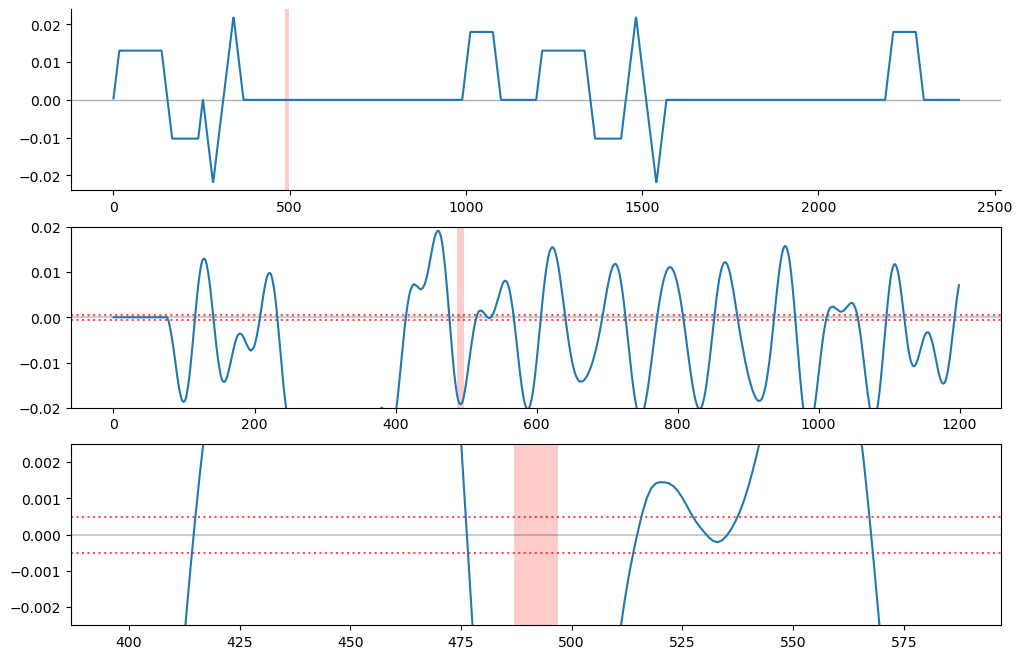

In [7]:
kwargs = {
           "T_bp":1.0e-3,
           "T_spoil": 1.0e-3,
           "shrink": 1,
           "tol": .0005,
           "offset_te": 14,
           "dW": 10,
           "do_ecpc": False,
           "do_bipolar":False,
           "do_spoiler":False,
           "verbose": 0,
            "print_optimize": False,
             }


g_out_ref, res_ref = run_all(fname, all_H0[0], **kwargs)

wave_plotter(g_out_ref, res_ref)



[win_start, win_stop] = [487, 497]
excite_idx_in: [  77 1277]
Status: True
0.157411013137969


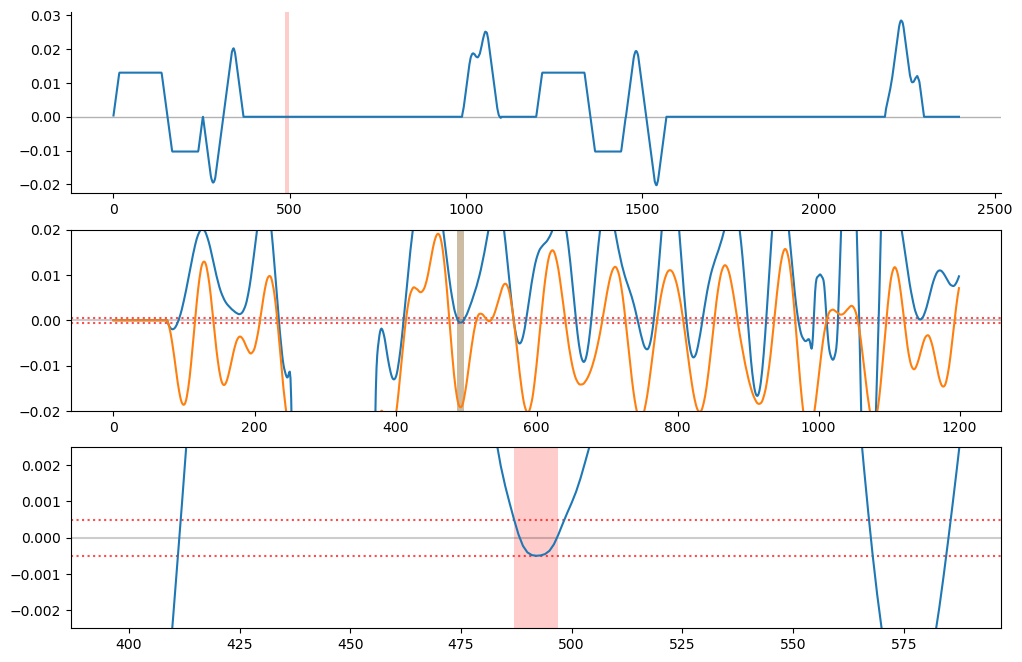

In [8]:
kwargs0 = {
           "T_bp": 1.16e-3,
           "T_spoil": 1.05e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 14,
           "dW": 10,
           "do_bipolar":True,
           "do_spoiler":True,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 16,
           "cg_resid_tol": 1e-2,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 1000,
            "kaiser_sigma": 300,
            # "add_tik": True,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, all_H0[0], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(0,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

[win_start, win_stop] = [507, 517]
excite_idx_in: [  77 1277]
Status: True
0.13278112154876578


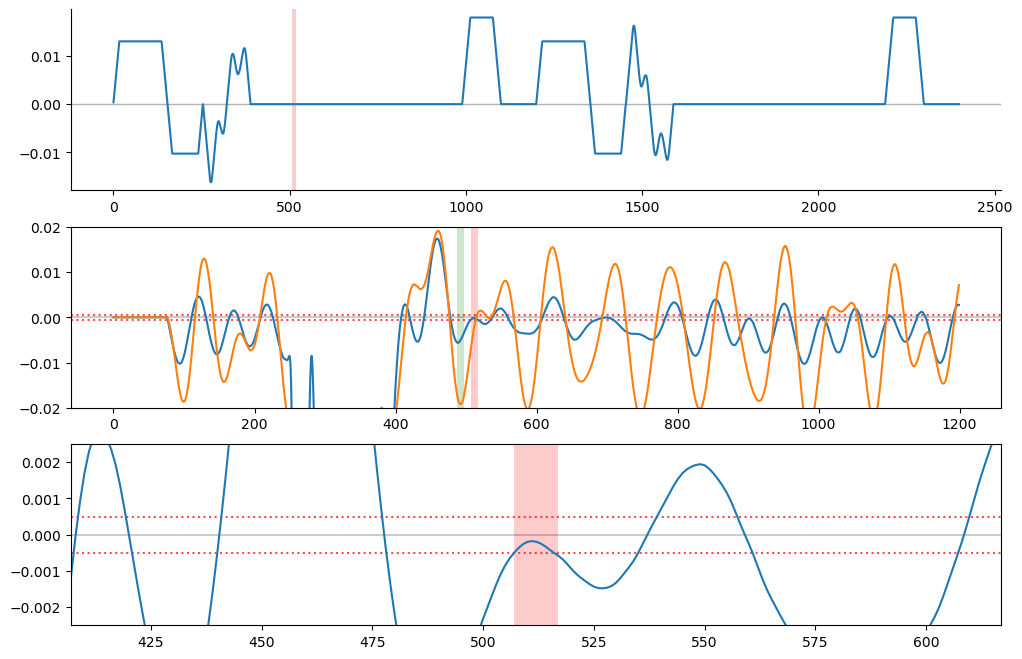

In [9]:
kwargs0 = {
           "T_bp": 1.36e-3,
           "T_spoil": 1.0e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 14,
           "dW": 10,
           "do_bipolar":True,
           "do_spoiler":False,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 20,
           "cg_resid_tol": 1e-1,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 2000,
            "kaiser_sigma": 30,
            # "add_tik": True,
             }



kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, all_H0[0], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(0,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

[win_start, win_stop] = [487, 497]
excite_idx_in: [  77 1277]
Status: True
0.1578281380347954


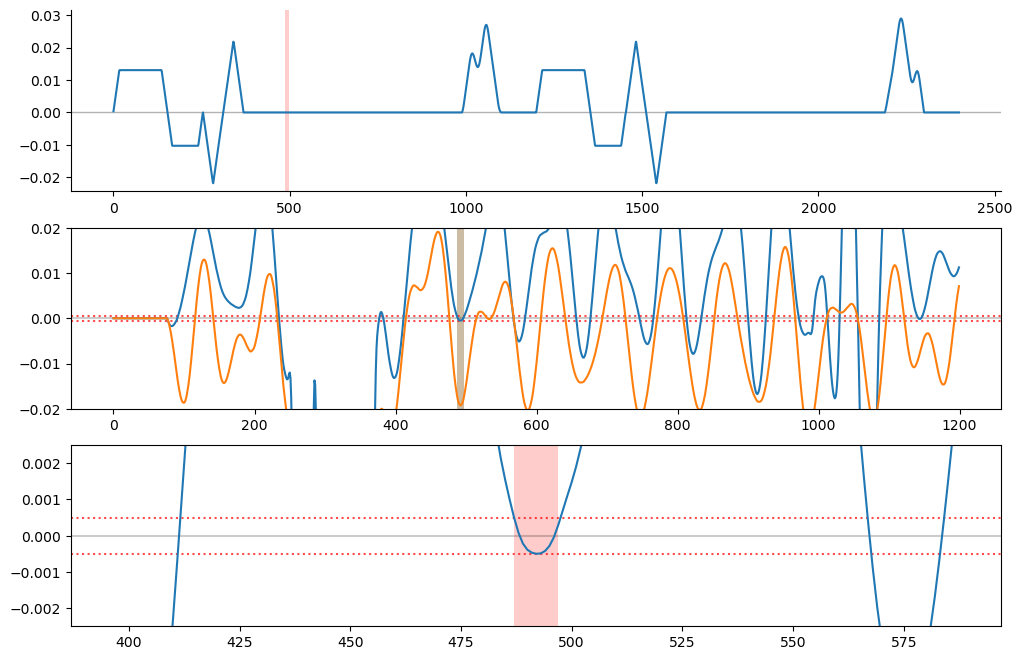

In [10]:
kwargs0 = {
           "T_bp": 1.0e-3,
           "T_spoil": 1.02e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 14,
           "dW": 10,
           "do_bipolar":False,
           "do_spoiler":True,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 20,
           "cg_resid_tol": 1e-1,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 2000,
            "kaiser_sigma": 30,
            # "add_tik": True,
             }



kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, all_H0[0], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(0,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

# Axial, Third window position
------------------

[win_start, win_stop] = [515, 525]
excite_idx_in: [  77 1277]


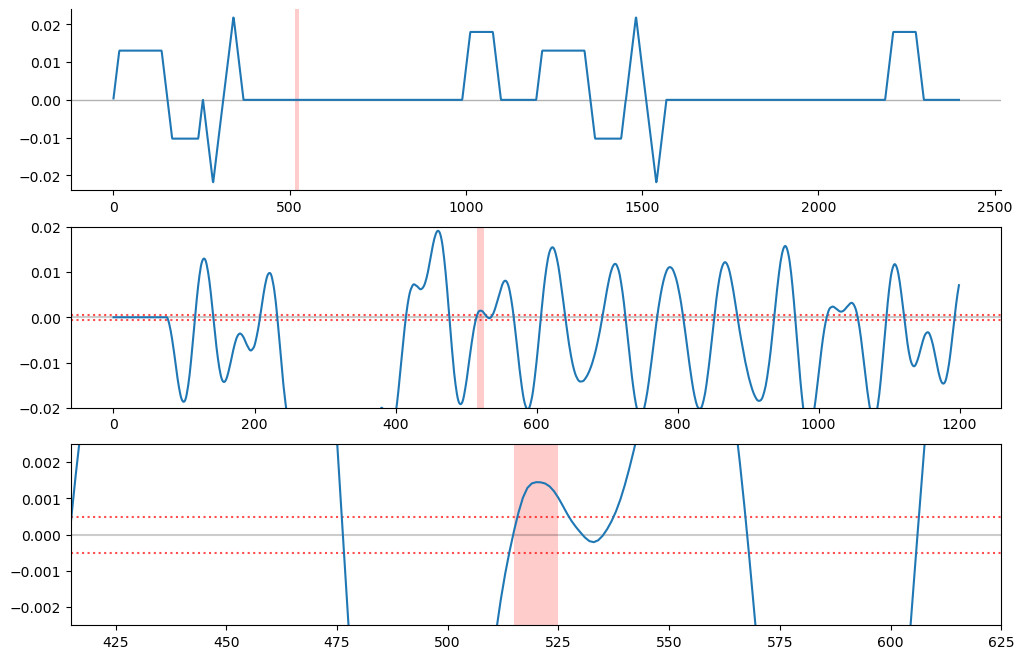

In [11]:
kwargs = {
           "T_bp":1.0e-3,
           "T_spoil": 1.0e-3,
           "shrink": 1,
           "tol": .0005,
           "offset_te": 21,
           "dW": 10,
           "do_ecpc": False,
           "do_bipolar":False,
           "do_spoiler":False,
           "verbose": 0,
            "print_optimize": False,
             }


g_out_ref, res_ref = run_all(fname, all_H0[0], **kwargs)

wave_plotter(g_out_ref, res_ref)

[win_start, win_stop] = [517, 527]
excite_idx_in: [  77 1277]
Status: True
0.15503855695086458


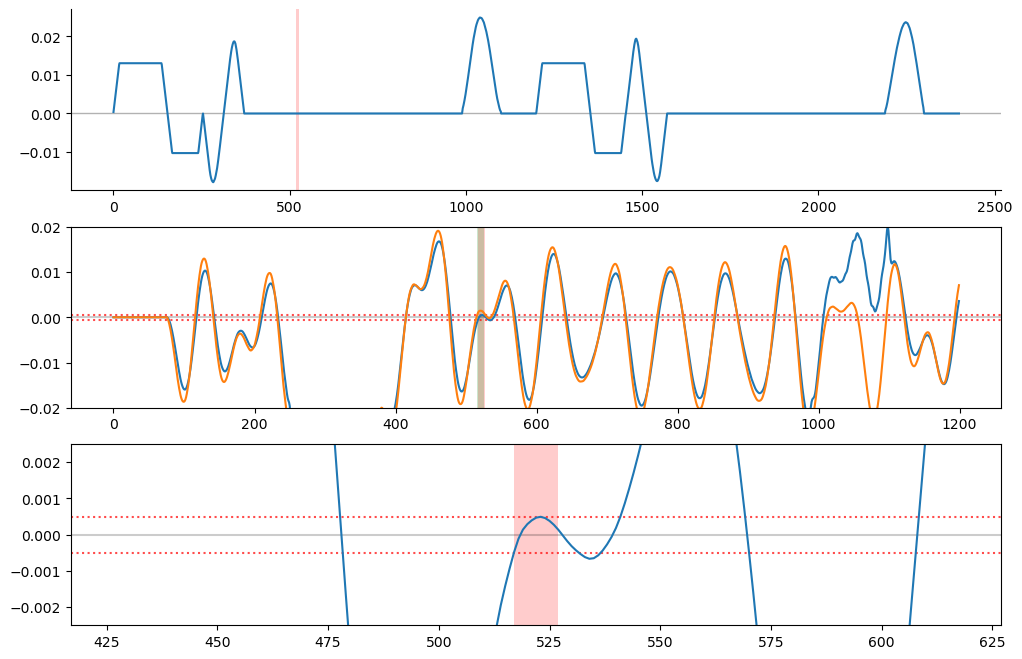

In [12]:
kwargs0 = {
           "T_bp": 1.18e-3,
           "T_spoil": 1.00e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 21,
           "dW": 10,
           "do_bipolar":True,
           "do_spoiler":True,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 10,
           "cg_resid_tol": 1e-2,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 1000,
            "kaiser_sigma": 300,
            # "add_tik": True,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, all_H0[0], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(0,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

[win_start, win_stop] = [517, 527]
excite_idx_in: [  77 1277]
Status: True
0.14805144747028837


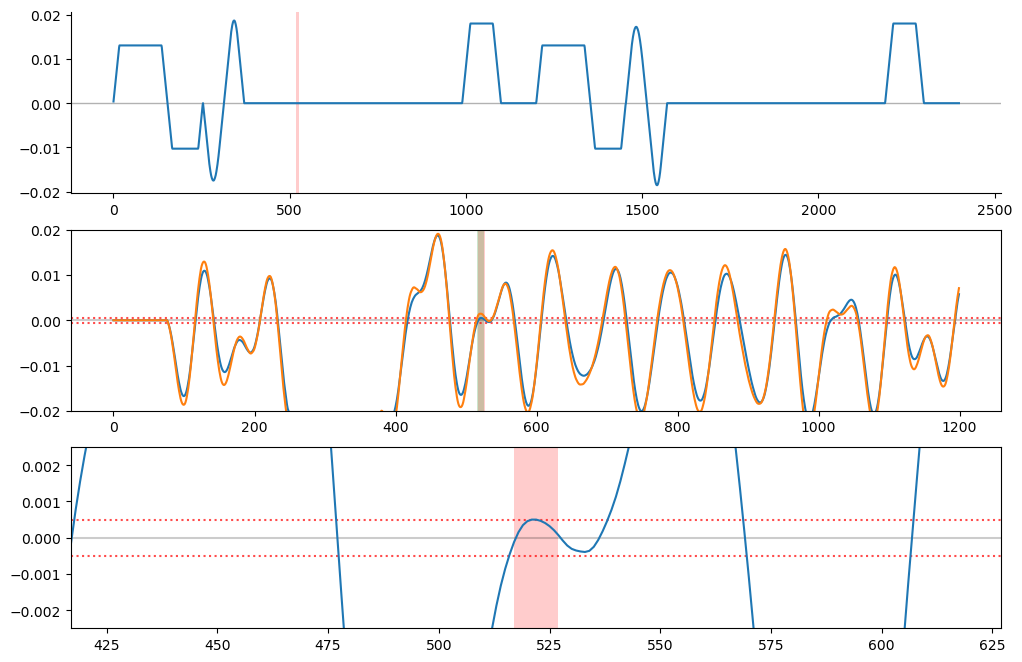

In [13]:
kwargs0 = {
           "T_bp": 1.18e-3,
           "T_spoil": 1.00e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 21,
           "dW": 10,
           "do_bipolar":True,
           "do_spoiler":False,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 10,
           "cg_resid_tol": 1e-2,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 1000,
            "kaiser_sigma": 300,
            # "add_tik": True,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, all_H0[0], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(0,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

[win_start, win_stop] = [515, 525]
excite_idx_in: [  77 1277]
Status: True
0.15752228850693326


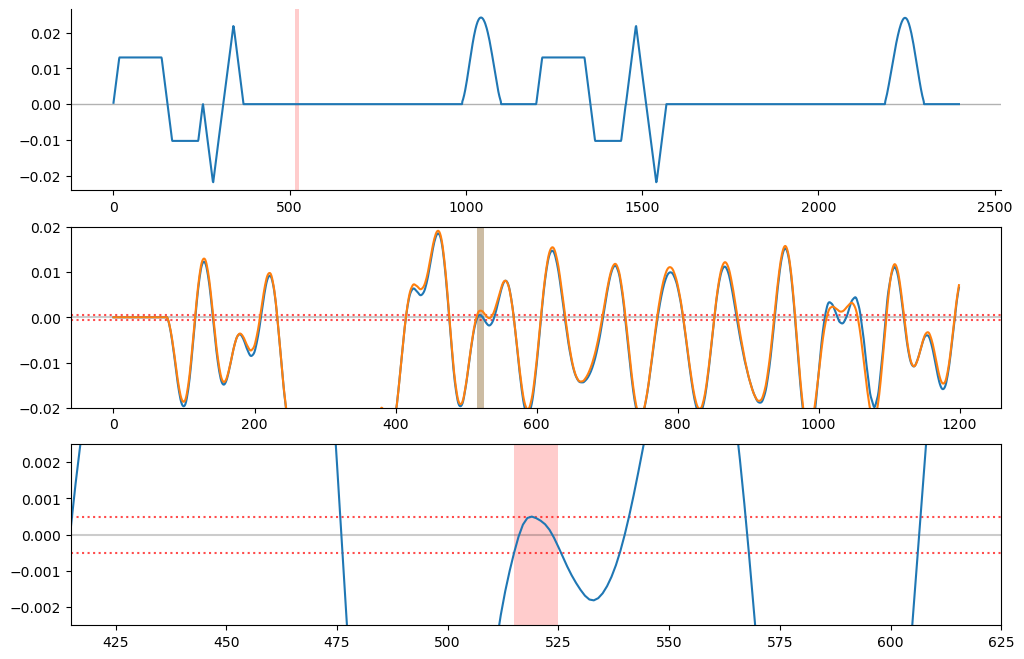

In [14]:
kwargs0 = {
           "T_bp": 1.18e-3,
           "T_spoil": 1.00e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 21,
           "dW": 10,
           "do_bipolar":False,
           "do_spoiler":True,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 10,
           "cg_resid_tol": 1e-2,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 1000,
            "kaiser_sigma": 300,
            # "add_tik": True,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, all_H0[0], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(0,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

# x-axis
----------------

[win_start, win_stop] = [451, 461]
excite_idx_in: [  77 1277]


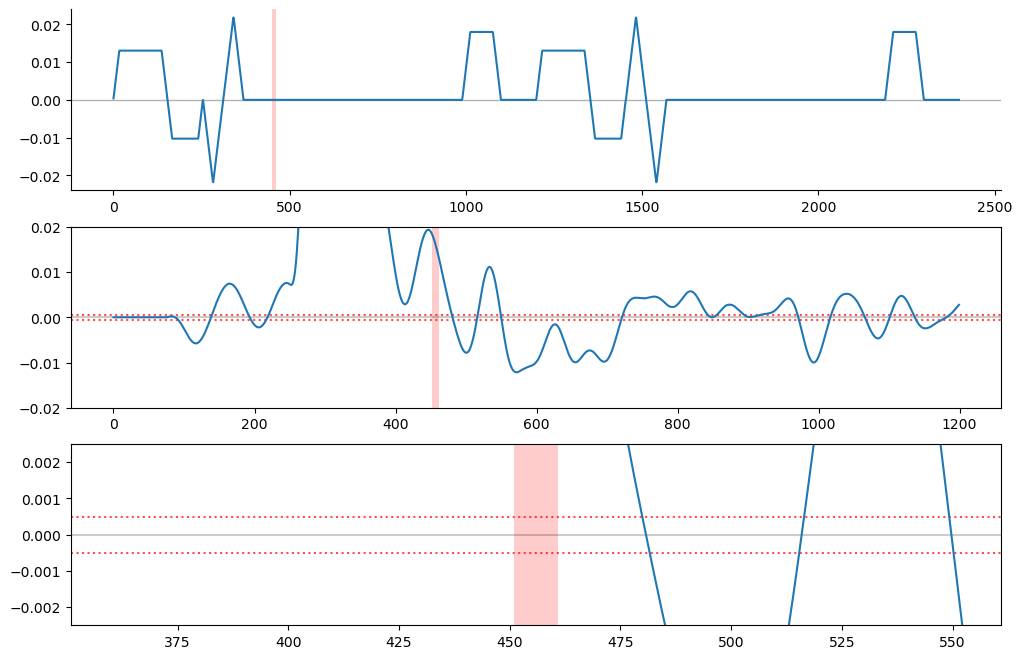

In [15]:
kwargs = {
           "T_bp":1.0e-3,
           "T_spoil": 1.0e-3,
           "shrink": 1,
           "tol": .0005,
           "offset_te": 5,
           "dW": 10,
           "do_ecpc": False,
           "do_bipolar":False,
           "do_spoiler":False,
           "verbose": 0,
            "print_optimize": False,
             }


g_out_ref, res_ref = run_all(fname, all_H0[1], **kwargs)

wave_plotter(g_out_ref, res_ref)

[win_start, win_stop] = [463, 473]
excite_idx_in: [  77 1277]
Status: True
0.14794131792461998


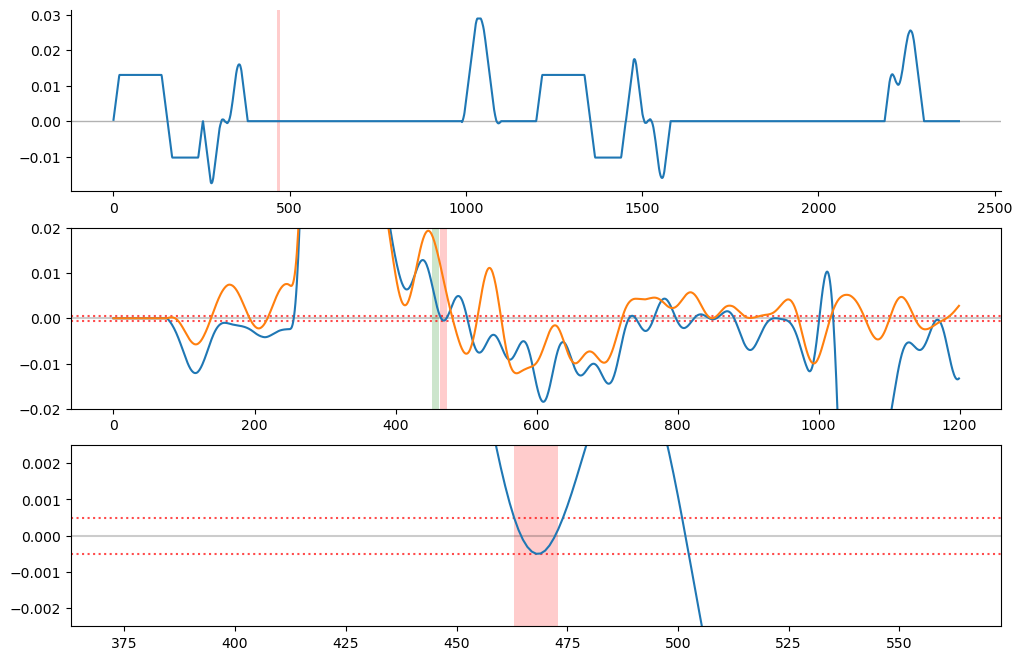

In [16]:
kwargs0 = {
           "T_bp": 1.28e-3,
           "T_spoil": 1.12e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 5,
           "dW": 10,
           "do_bipolar":True,
           "do_spoiler":True,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 10,
           "cg_resid_tol": 1e-2,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 1000,
            "kaiser_sigma": 300,
            # "add_tik": True,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, all_H0[1], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(1,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

[win_start, win_stop] = [467, 477]
excite_idx_in: [  77 1277]
Status: True
0.13635078172641774


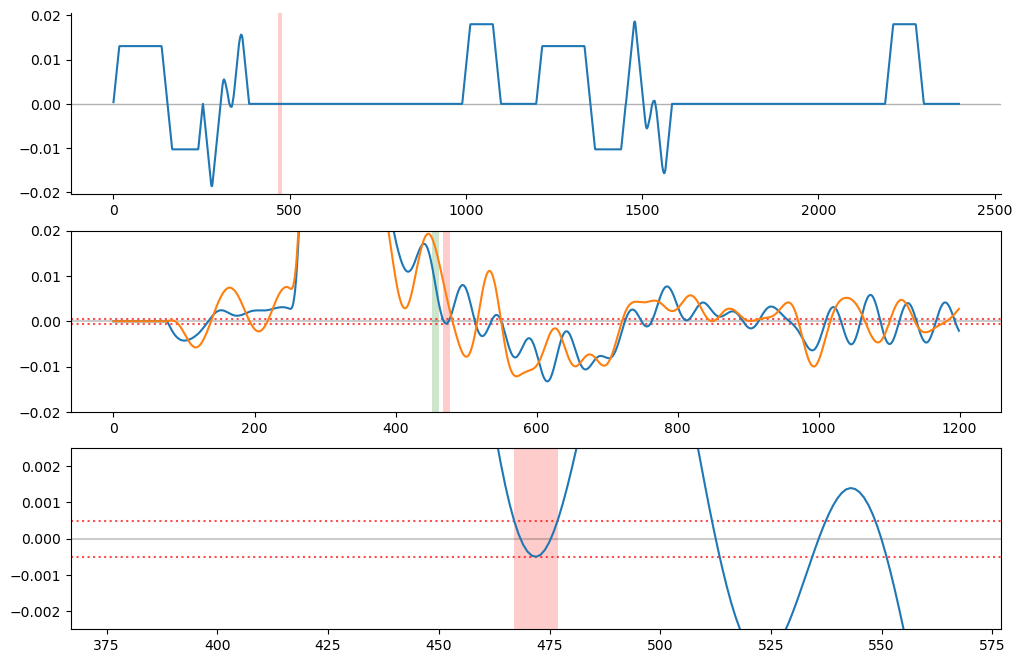

In [17]:
kwargs0 = {
           "T_bp": 1.32e-3,
           "T_spoil": 1.12e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 5,
           "dW": 10,
           "do_bipolar":True,
           "do_spoiler":False,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 10,
           "cg_resid_tol": 1e-2,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 1000,
            "kaiser_sigma": 300,
            # "add_tik": True,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, all_H0[1], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)


savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(1,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

[win_start, win_stop] = [451, 461]
excite_idx_in: [  77 1277]
Status: True
0.1691089375251226


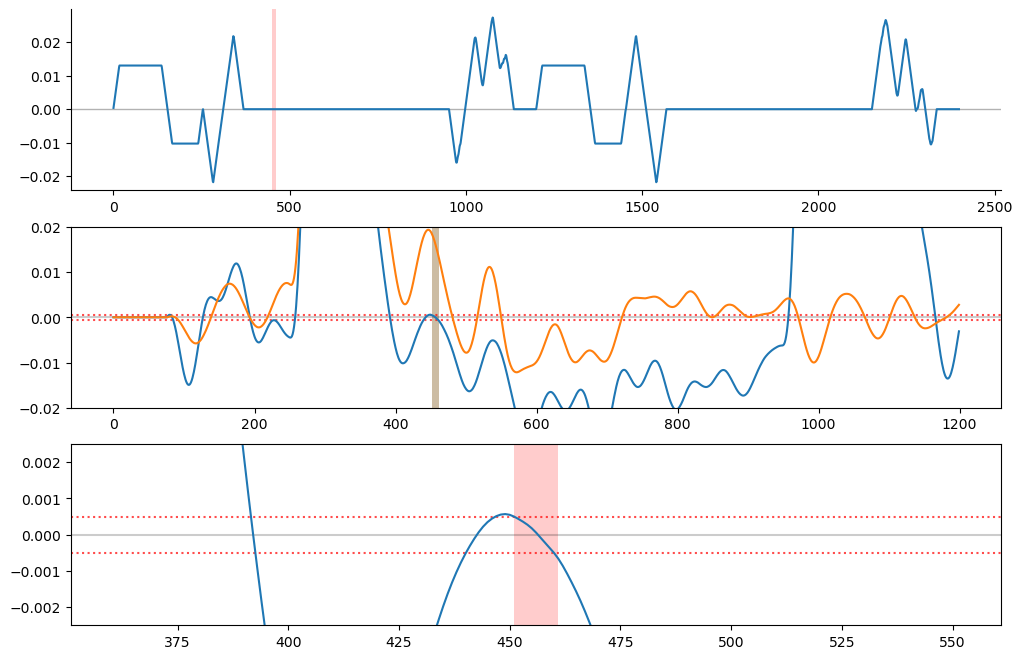

In [18]:
kwargs0 = {
           "T_bp": 1.32e-3,
           "T_spoil": 1.84e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 5,
           "dW": 10,
           "do_bipolar":False,
           "do_spoiler":True,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 10,
           "cg_resid_tol": 1e-2,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 1000,
            "kaiser_sigma": 300,
            # "add_tik": True,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, all_H0[1], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)


savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(1,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

# y-axis
--------------------

[win_start, win_stop] = [451, 461]
excite_idx_in: [  77 1277]


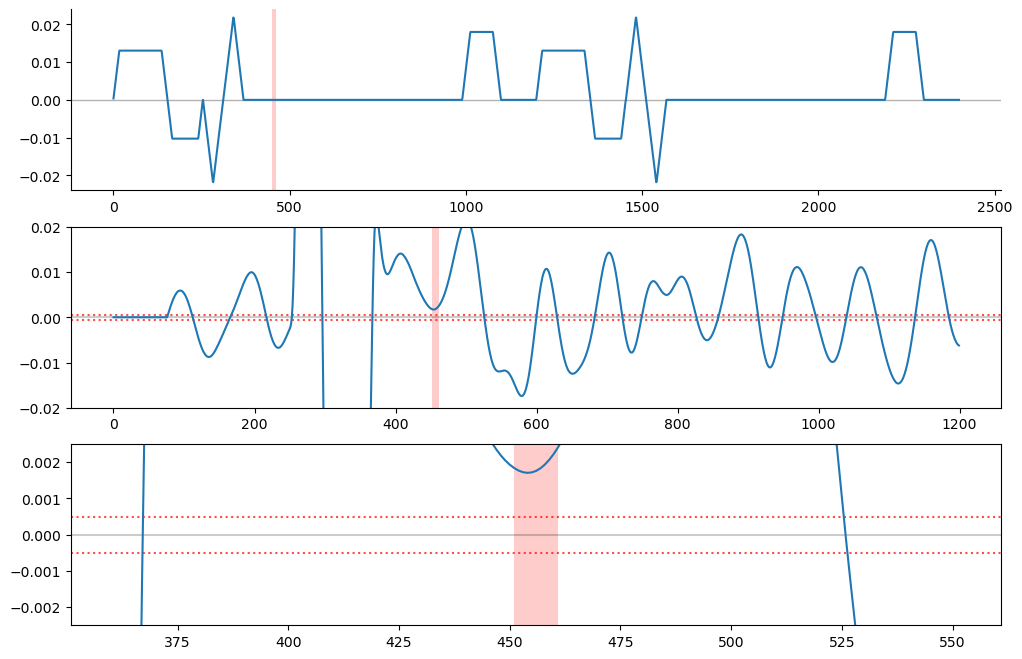

In [19]:
kwargs = {
           "T_bp":1.0e-3,
           "T_spoil": 1.0e-3,
           "shrink": 1,
           "tol": .0005,
           "offset_te": 5,
           "dW": 10,
           "do_ecpc": False,
           "do_bipolar":False,
           "do_spoiler":False,
           "verbose": 0,
            "print_optimize": False,
             }


g_out_ref, res_ref = run_all(fname, all_H0[2], **kwargs)

wave_plotter(g_out_ref, res_ref)

[win_start, win_stop] = [455, 465]
excite_idx_in: [  77 1277]
Status: True
0.15557553045203176


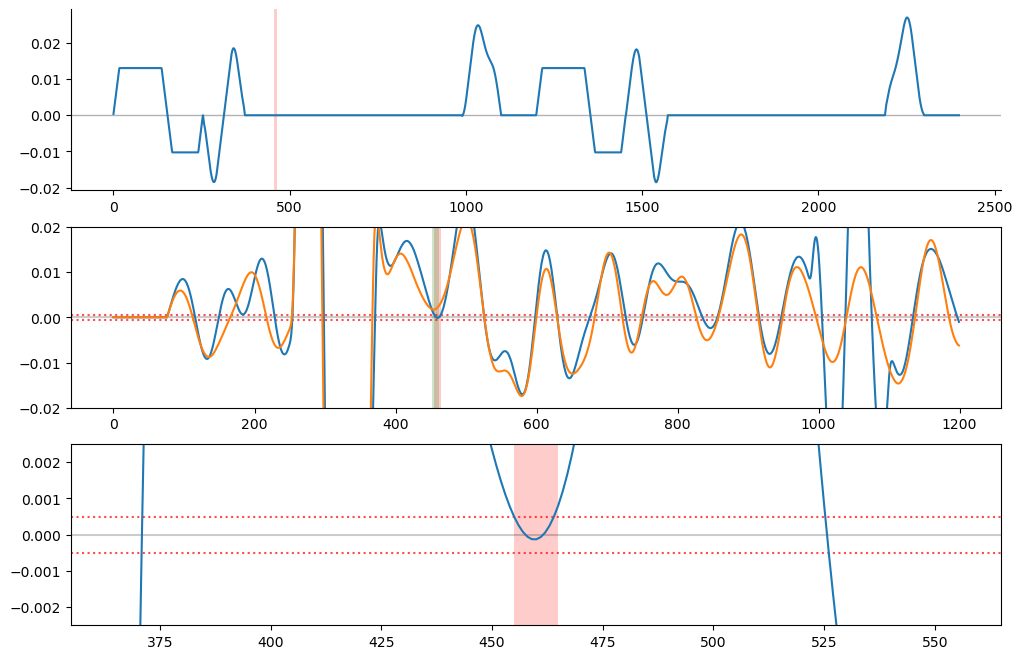

In [20]:
kwargs0 = {
           "T_bp": 1.2e-3,
           "T_spoil": 1.0e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 5,
           "dW": 10,
           "do_bipolar":True,
           "do_spoiler":True,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 10,
           "cg_resid_tol": 1e-2,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 1000,
            "kaiser_sigma": 300,
            # "add_tik": True,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, all_H0[2], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)


savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(2,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

[win_start, win_stop] = [501, 511]
excite_idx_in: [  77 1277]
Status: True
0.14534926702144602


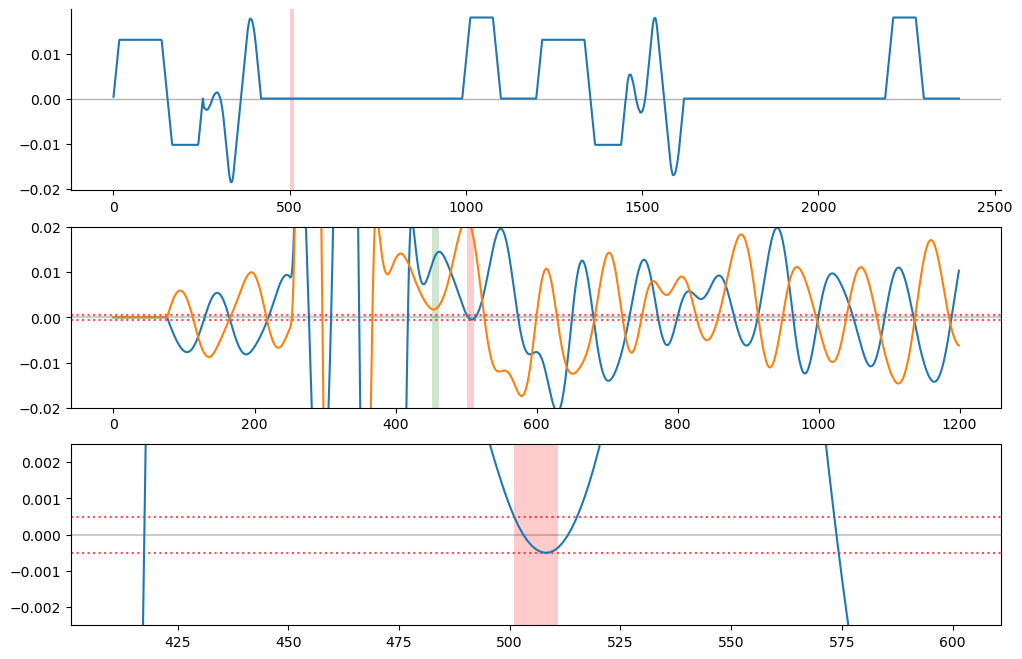

In [21]:
kwargs0 = {
           "T_bp": 1.66e-3,
           "T_spoil": 1.0e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 5,
           "dW": 10,
           "do_bipolar":True,
           "do_spoiler":False,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 16,
           "cg_resid_tol": 1e-2,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 1000,
            "kaiser_sigma": 300,
            # "add_tik": True,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, all_H0[2], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(2,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

[win_start, win_stop] = [451, 461]
excite_idx_in: [  77 1277]
Status: True
0.15805514177760882


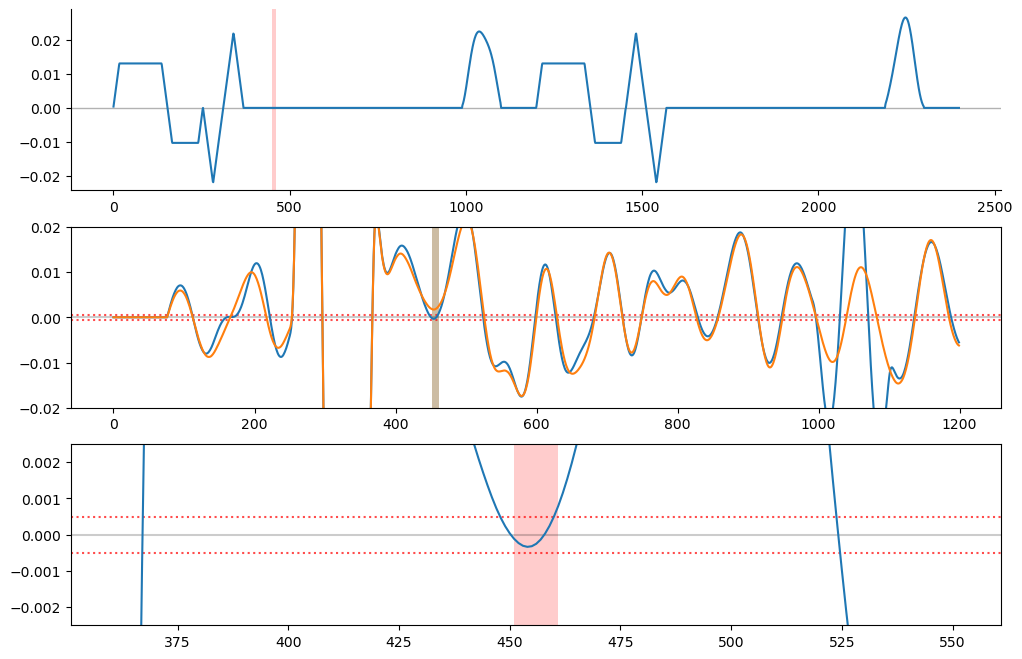

In [22]:
kwargs0 = {
           "T_bp": 1.2e-3,
           "T_spoil": 1.0e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0005,
           "offset_te": 5,
           "dW": 10,
           "do_bipolar":False,
           "do_spoiler":True,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 10,
           "cg_resid_tol": 1e-2,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 1000,
            "kaiser_sigma": 300,
            # "add_tik": True,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, all_H0[2], **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(2,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_2/'+savename, res)

# Rotated T -> C 45
--------------------

In [4]:
r = R.from_euler('x', 45, degrees=True)

HR = np.linalg.inv(r.as_matrix()) @ all_H0[[1,2,0],:]
HR = HR[2]

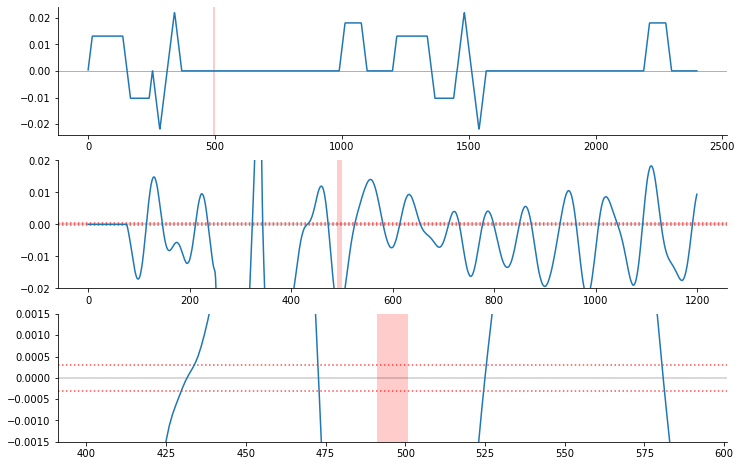

In [11]:
kwargs = {
           "T_bp":1.0e-3,
           "T_spoil": 1.0e-3,
           "shrink": 1,
           "tol": .0003,
           "offset_te": 15,
           "dW": 10,
           "do_ecpc": False,
           "do_bipolar":False,
           "do_spoiler":False,
           "verbose": 0,
            "print_optimize": False,
             }


g_out_ref, res_ref = run_all(fname, HR, **kwargs)

wave_plotter(g_out_ref, res_ref)

Status: True
0.14973825486054473


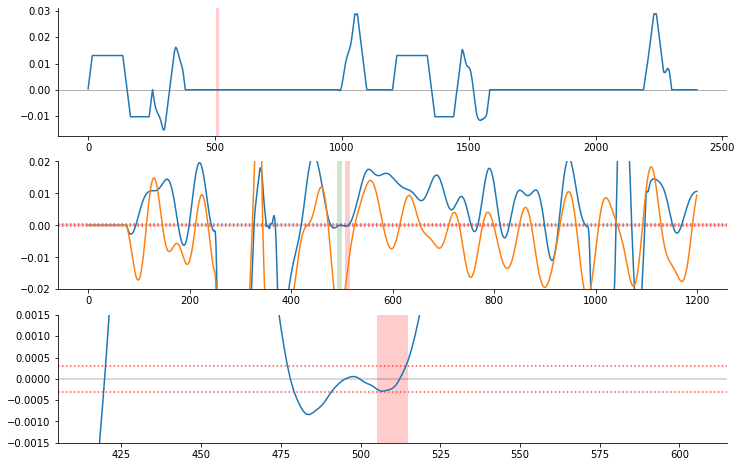

In [13]:
kwargs0 = {
           "T_bp": 1.30e-3,
           "T_spoil": 1.02e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0003,
           "offset_te": 15,
           "dW": 10,
           "do_bipolar":True,
           "do_spoiler":True,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 14,
           "cg_resid_tol": 1e-2,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 2000,
            "kaiser_sigma": 80,
            # "add_tik": True,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, HR, **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(4,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_4/'+savename, res)

Status: True
0.1290384116727756


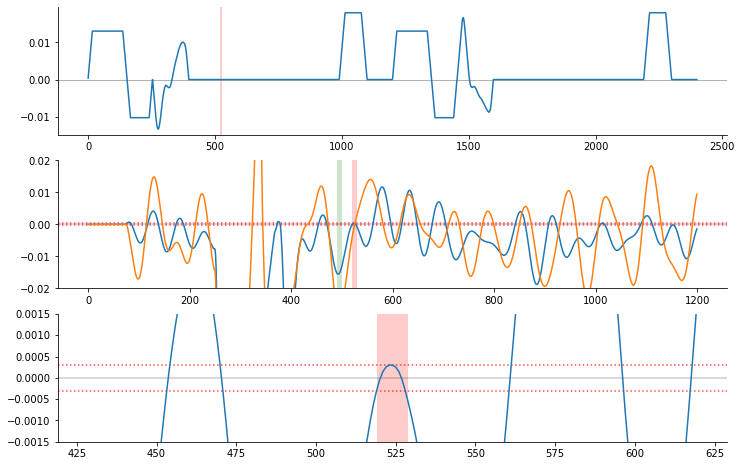

In [17]:
kwargs0 = {
           "T_bp": 1.44e-3,
           "T_spoil": 1.0e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0003,
           "offset_te": 15,
           "dW": 10,
           "do_bipolar":True,
           "do_spoiler":False,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 14,
           "cg_resid_tol": 1e-2,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 2000,
            "kaiser_sigma": 80,
            # "add_tik": True,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, HR, **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(4,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_4/'+savename, res)

Status: True
0.15279574367740972


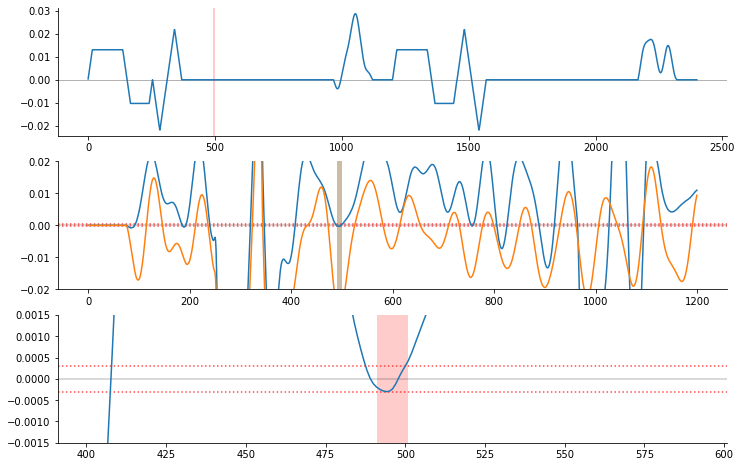

In [15]:
kwargs0 = {
           "T_bp": 1.0e-3,
           "T_spoil": 1.54e-3,
           "shrink": 1,
           "do_ecpc": True,
           "tol": .0003,
           "offset_te": 15,
           "dW": 10,
           "do_bipolar":False,
           "do_spoiler":True,
           "verbose": 10,
            "N_feval": 50000,
           "cg_niter": 14,
           "cg_resid_tol": 1e-2,
            "cg_abs_tol": 1e-8,
            "print_optimize": False,
            "smooth_weight": 2000,
            "kaiser_sigma": 80,
            # "add_tik": True,
             }


kwargs = copy.deepcopy(kwargs0)

g_out, res = run_all(fname, HR, **kwargs)
print('Status:', res['final_good'] > 0)
print(np.linalg.norm(g_out)**2)

wave_plotter(g_out, res, g_out_ref, res_ref)

savename = 'H{:d}_offset{:02d}_bp{:d}_sp{:d}.mat'.format(4,kwargs['offset_te'],kwargs['do_bipolar'],kwargs['do_spoiler'])
if res['final_good'] > 0:
    savemat('./waves_2023_0719_4/'+savename, res)